<a href="https://colab.research.google.com/github/tgoalm/datascience/blob/main/introducao_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn
import seaborn as sns
print(sns.__version__)

0.11.1


#Analisando as notas em geral

In [5]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [6]:
notas.shape

(43084, 4)

In [7]:
notas.columns = ["usuarioid", "filmeid", "nota", "Momento"]

In [8]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas["nota"].value_counts()

4.0    11781
3.0     8533
5.0     6093
3.5     5408
4.5     4055
2.0     3085
2.5     1990
1.0     1131
1.5      535
0.5      473
Name: nota, dtype: int64

In [10]:
print("Média:", notas["nota"].mean())
print("Mediana:", notas.nota.median())

Média: 3.5669506081143814
Mediana: 4.0


In [11]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

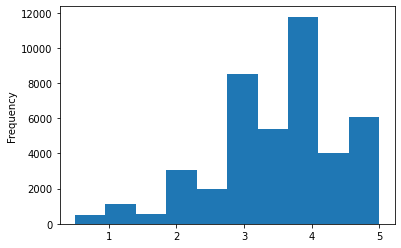

In [12]:
notas.nota.plot(kind='hist')

In [13]:
notas.nota.describe()

count    43084.000000
mean         3.566951
std          1.022535
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


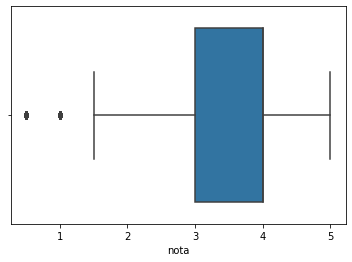

In [14]:
sns.boxplot(notas.nota)

#Olhando os filmes

In [15]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeid", "titulo", "generos"]
filmes.head()

,filmeid,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
notas.head()

,usuarioid,filmeid,nota,Momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


#Analisando algumas notas específicas por filme

In [17]:
print(notas.query("filmeid == 1").nota.mean())
print(notas.query("filmeid == 2").nota.mean())

3.897196261682243
3.3666666666666667


In [18]:
medias_por_filme = notas.groupby("filmeid").mean()["nota"]
medias_por_filme.head()

filmeid
1    3.897196
2    3.366667
3    3.538462
4    2.600000
5    3.480000
Name: nota, dtype: float64

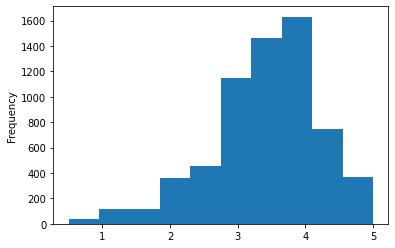

In [19]:
medias_por_filme.plot(kind="hist")

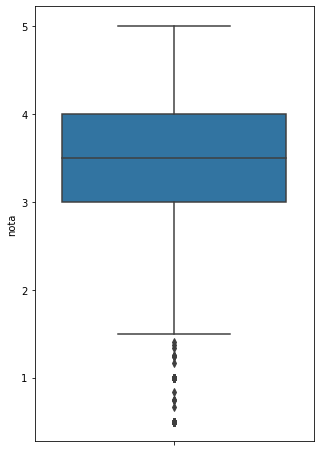

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [21]:
medias_por_filme.describe()

count    6433.000000
mean        3.436251
std         0.853154
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: nota, dtype: float64

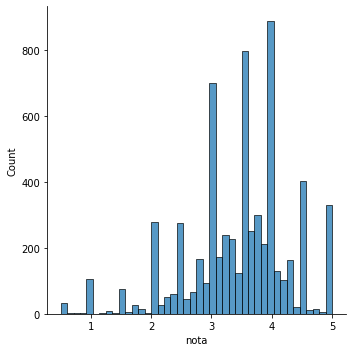

In [22]:
sns.displot(medias_por_filme)

Text(0.5, 1.0, 'Histograma da média dos filmes')

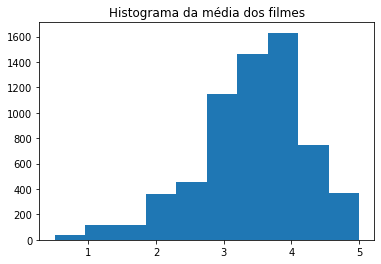

In [23]:
plt.hist(medias_por_filme)
plt.title("Histograma da média dos filmes")

In [24]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [25]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [26]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ro', 'ta', 'cs', 'ar', 'id', 'nb',
       'el', 'hu', 'no', 'ps', 'tr', 'is', 'ky', 'pl', 'sl', 'vi', 'te', 'af',
       'xx'],
      dtype='object')

In [27]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [28]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


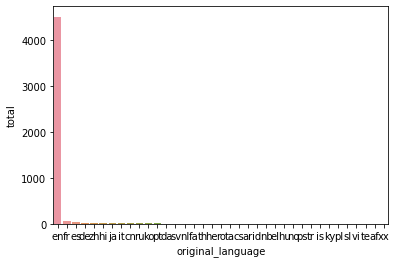

In [29]:
sns.barplot(x="original_language", y="total", data=contagem_de_lingua)

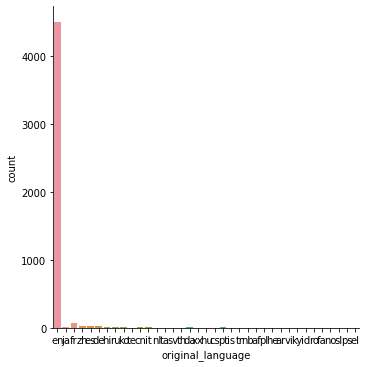

In [30]:
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x7f99eee41b50>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

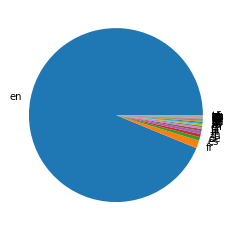

In [31]:
plt.pie(contagem_de_lingua["total"], labels=contagem_de_lingua["original_language"])

In [32]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


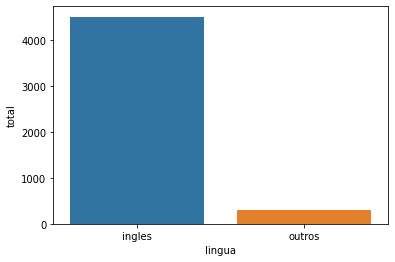

In [33]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
} 
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data=dados)

([<matplotlib.patches.Wedge at 0x7f99eecbfe10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

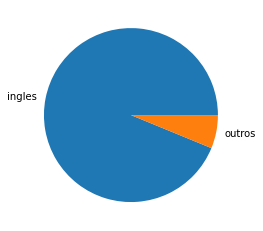

In [34]:
plt.pie(dados["total"], labels=dados["lingua"])

In [68]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes.index


Index(['fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt', 'da',
       'sv', 'fa', 'nl', 'th', 'he', 'ta', 'cs', 'id', 'ro', 'ar', 'ps', 'is',
       'tr', 'pl', 'hu', 'xx', 'el', 'ky', 'vi', 'no', 'sl', 'nb', 'te', 'af'],
      dtype='object')

Index(['fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt', 'da',
       'sv', 'fa', 'nl', 'th', 'he', 'ta', 'cs', 'id', 'ro', 'ar', 'ps', 'is',
       'tr', 'pl', 'hu', 'xx', 'el', 'ky', 'vi', 'no', 'sl', 'nb', 'te', 'af'],
      dtype='object')


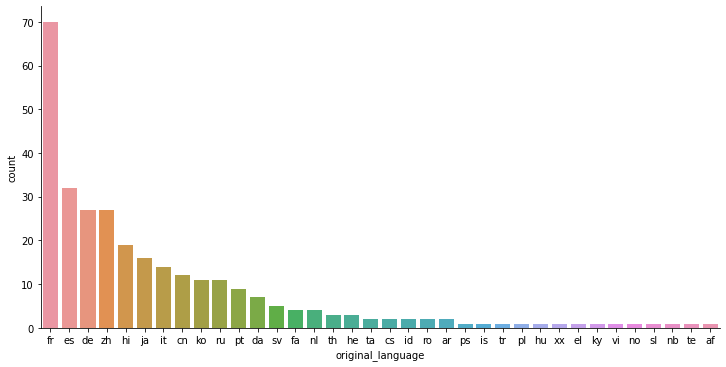

In [72]:
filmes_sem_lingua_original_em_ingles = total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'")
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
sns.catplot(x="original_language", 
            kind="count", 
            data=filmes_sem_lingua_original_em_ingles, 
            aspect=2, 
            order=total_por_lingua_de_outros_filmes.index
            )

print(total_por_lingua_de_outros_filmes.index)